In [2]:
import pandas as pd
import numpy as np
# from sklearn.preprocessing import 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
from pycaret.classification import * 
from dataprep.eda import create_report

In [3]:
train = pd.read_csv('./data/train.csv', index_col=0)
test = pd.read_csv('./data/test.csv', index_col=0)
submission = pd.read_csv('./data/sample_submission.csv')

In [3]:
# report = create_report(train)
# report.save('dataprep_reoprt')

1. train.csv : 학습 데이터
- id : 샘플 아이디
- Gender : 성별
- Customer Type : Disloyal 또는 Loyal 고객
- Age : 나이
- Type of Travel : Business 또는 Personal Travel
- Class : 등급
- Flight Distance : 비행 거리
- Seat comfort : 좌석 만족도
- Departure/Arrival time convenient : 출발/도착 시간 편의성 만족도
- Food and drink : 식음료 만족도
- Gate location : 게이트 위치 만족도
- Inflight wifi service : 기내 와이파이 서비스 만족도
- Inflight entertainment : 기내 엔터테인먼트 만족도
- Online support : 온라인 지원 만족도
- Ease of Online booking : 온라인 예매 편리성 만족도
- On-board service : 탑승 서비스 만족도
- Leg room service : Leg room 서비스 만족도
- Baggage handling : 수하물 처리 만족도
- Checkin service : 체크인 서비스 만족도
- Cleanliness : 청결도 만족도
- Online boarding : 온라인보딩 만족도
- Departure Delay in Minutes : 출발 지연 시간
- Arrival Delay in Minutes : 도착 지연 시간
- target : 만족 여부

In [48]:
train.columns = train.columns.str.replace(' ', '_')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3000 non-null   object 
 1   Customer_Type                      3000 non-null   object 
 2   Age                                3000 non-null   int64  
 3   Type_of_Travel                     3000 non-null   object 
 4   Class                              3000 non-null   object 
 5   Flight_Distance                    3000 non-null   int64  
 6   Seat_comfort                       3000 non-null   int64  
 7   Departure/Arrival_time_convenient  3000 non-null   int64  
 8   Food_and_drink                     3000 non-null   int64  
 9   Gate_location                      3000 non-null   int64  
 10  Inflight_wifi_service              3000 non-null   int64  
 11  Inflight_entertainment             3000 non-null   int64

In [8]:
test.columns = test.columns.str.replace(' ', '_')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             2000 non-null   object 
 1   Customer_Type                      2000 non-null   object 
 2   Age                                2000 non-null   int64  
 3   Type_of_Travel                     2000 non-null   object 
 4   Class                              2000 non-null   object 
 5   Flight_Distance                    2000 non-null   int64  
 6   Seat_comfort                       2000 non-null   int64  
 7   Departure/Arrival_time_convenient  2000 non-null   int64  
 8   Food_and_drink                     2000 non-null   int64  
 9   Gate_location                      2000 non-null   int64  
 10  Inflight_wifi_service              2000 non-null   int64  
 11  Inflight_entertainment             2000 non-null   int64

* 훈련 데이터가 적고 결측치가 존재하지 않음

In [6]:
train.describe()

Age  Flight_Distance  Seat_comfort  \
count  3000.000000      3000.000000   3000.000000   
mean     39.203000      1983.079333      2.863333   
std      15.108802      1028.109117      1.394981   
min       7.000000        52.000000      0.000000   
25%      27.000000      1348.250000      2.000000   
50%      39.000000      1937.000000      3.000000   
75%      51.000000      2547.250000      4.000000   
max      80.000000      6882.000000      5.000000   

       Departure/Arrival_time_convenient  Food_and_drink  Gate_location  \
count                        3000.000000     3000.000000    3000.000000   
mean                            3.009667        2.874333       3.016667   
std                             1.519543        1.431511       1.294713   
min                             0.000000        0.000000       1.000000   
25%                             2.000000        2.000000       2.000000   
50%                             3.000000        3.000000       3.000000   
75%                             4.000000        4.000000       4.000000   
max                             5.000000        5.000000       5.000000   

       Inflight_wifi_service  Inflight_entertainment  Online_support  \
count            3000.000000             3000.000000      3000.00000   
mean                3.259667                3.352333         3.50500   
std                 1.322683                1.352826         1.31068   
min                 0.000000                0.000000         1.00000   
25%                 2.000000                2.000000         3.00000   
50%                 3.000000                4.000000         4.00000   
75%                 4.000000                4.000000         5.00000   
max                 5.000000                5.000000         5.00000   

       Ease_of_Online_booking  On-board_service  Leg_room_service  \
count             3000.000000       3000.000000       3000.000000   
mean                 3.488000          3.497000          3.485000   
std                  1.302211          1.283436          1.294218   
min                  0.000000          1.000000          0.000000   
25%                  2.000000          3.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  5.000000          5.000000          5.000000   
max                  5.000000          5.000000          5.000000   

       Baggage_handling  Checkin_service  Cleanliness  Online_boarding  \
count       3000.000000      3000.000000  3000.000000      3000.000000   
mean           3.728667         3.370000     3.728667         3.356333   
std            1.154190         1.258158     1.161678         1.294057   
min            1.000000         1.000000     1.000000         0.000000   
25%            3.000000         3.000000     3.000000         2.000000   
50%            4.000000         3.000000     4.000000         4.000000   
75%            5.000000         4.000000     5.000000         4.000000   
max            5.000000         5.000000     5.000000         5.000000   

       Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes       target  
count                 3000.000000               3000.000000  3000.000000  
mean                    15.634333                 15.922000     0.556000  
std                     45.083228                 45.203411     0.496937  
min                      0.000000                  0.000000     0.000000  
25%                      0.000000                  0.000000     0.000000  
50%                      0.000000                  0.000000     1.000000  
75%                     12.000000                 13.000000     1.000000  
max                   1128.000000               1115.000000     1.000000

In [7]:
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

In [8]:
train.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Seat_comfort', 'Departure/Arrival_time_convenient',
       'Food_and_drink', 'Gate_location', 'Inflight_wifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Online_booking',
       'On-board_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes', 'target'],
      dtype='object')

In [9]:
cat_features = ['Gender', 'Customer_Type', 'Type_of_Travel', 'Class','Seat_comfort', 'Departure/Arrival_time_convenient',
       'Food_and_drink', 'Gate_location', 'Inflight_wifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Online_booking',
       'On-board_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding']
num_features = ['Age', 'Flight_Distance','Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']

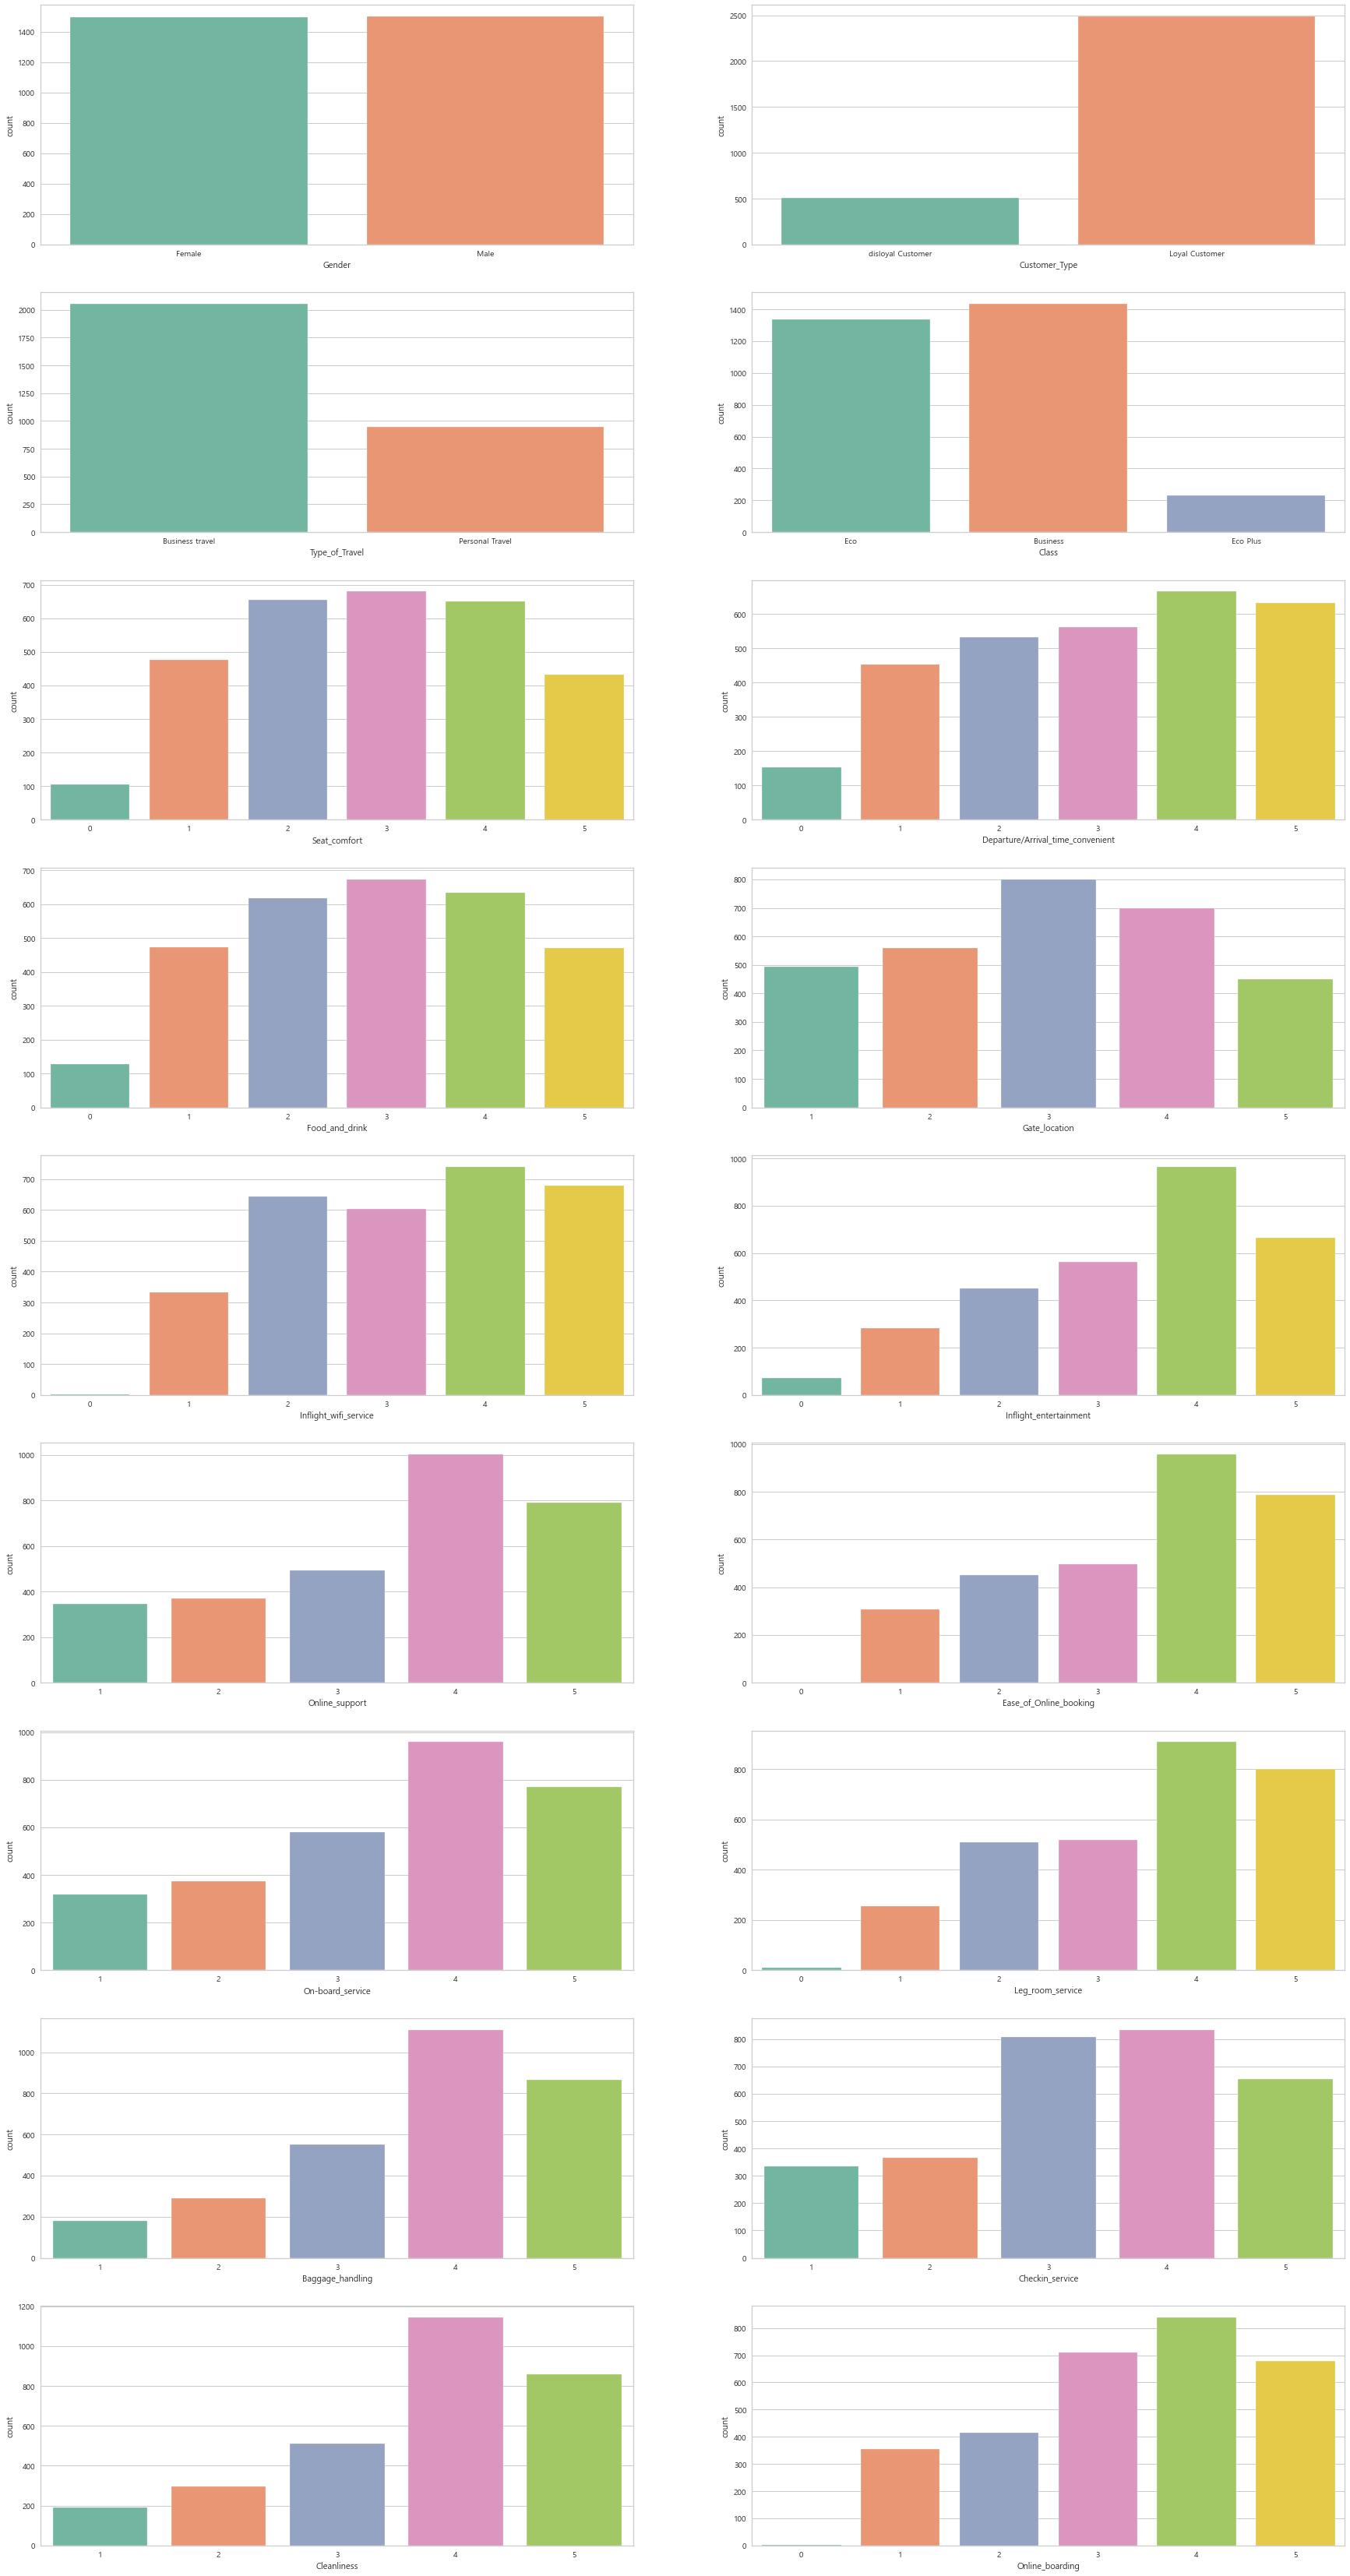

In [10]:
fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(30, 60))
for i, col_name in enumerate(cat_features):
    sns.countplot(x=col_name, data=train, ax=ax[i//2][i%2], palette='Set2')
plt.show()

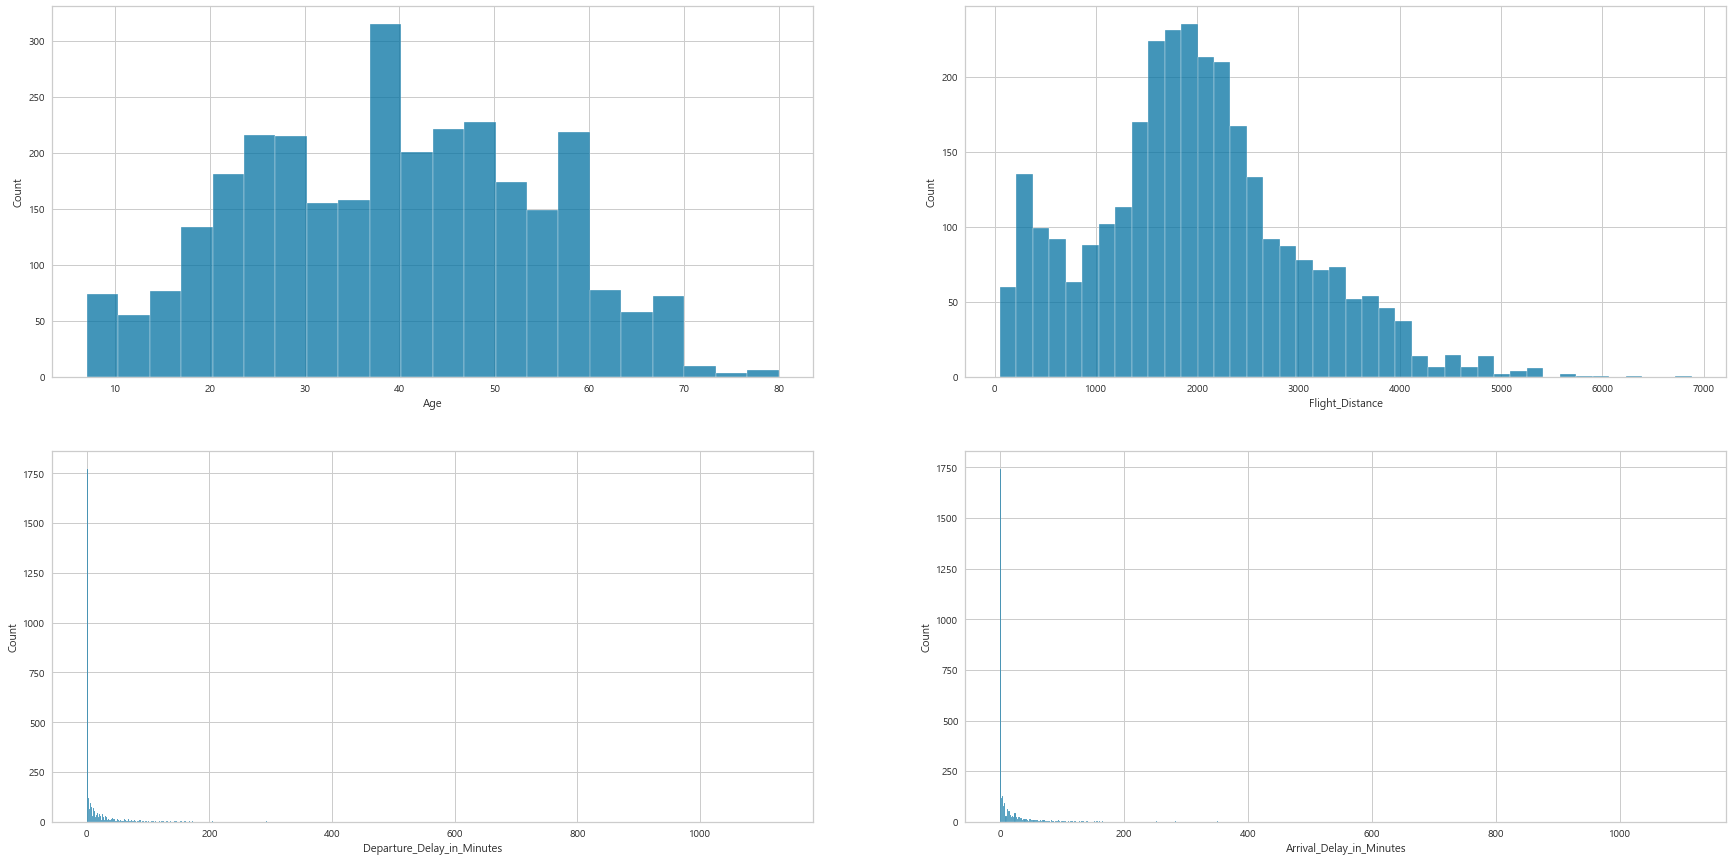

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(30, 15))
for i, col_name in enumerate(num_features):
    sns.histplot(x=col_name, data=train, ax=ax[i//2][i%2], palette='Set2')
plt.show()

age를 제외한 나머지는 그래프가 왼쪽으로 치우쳐 있음.

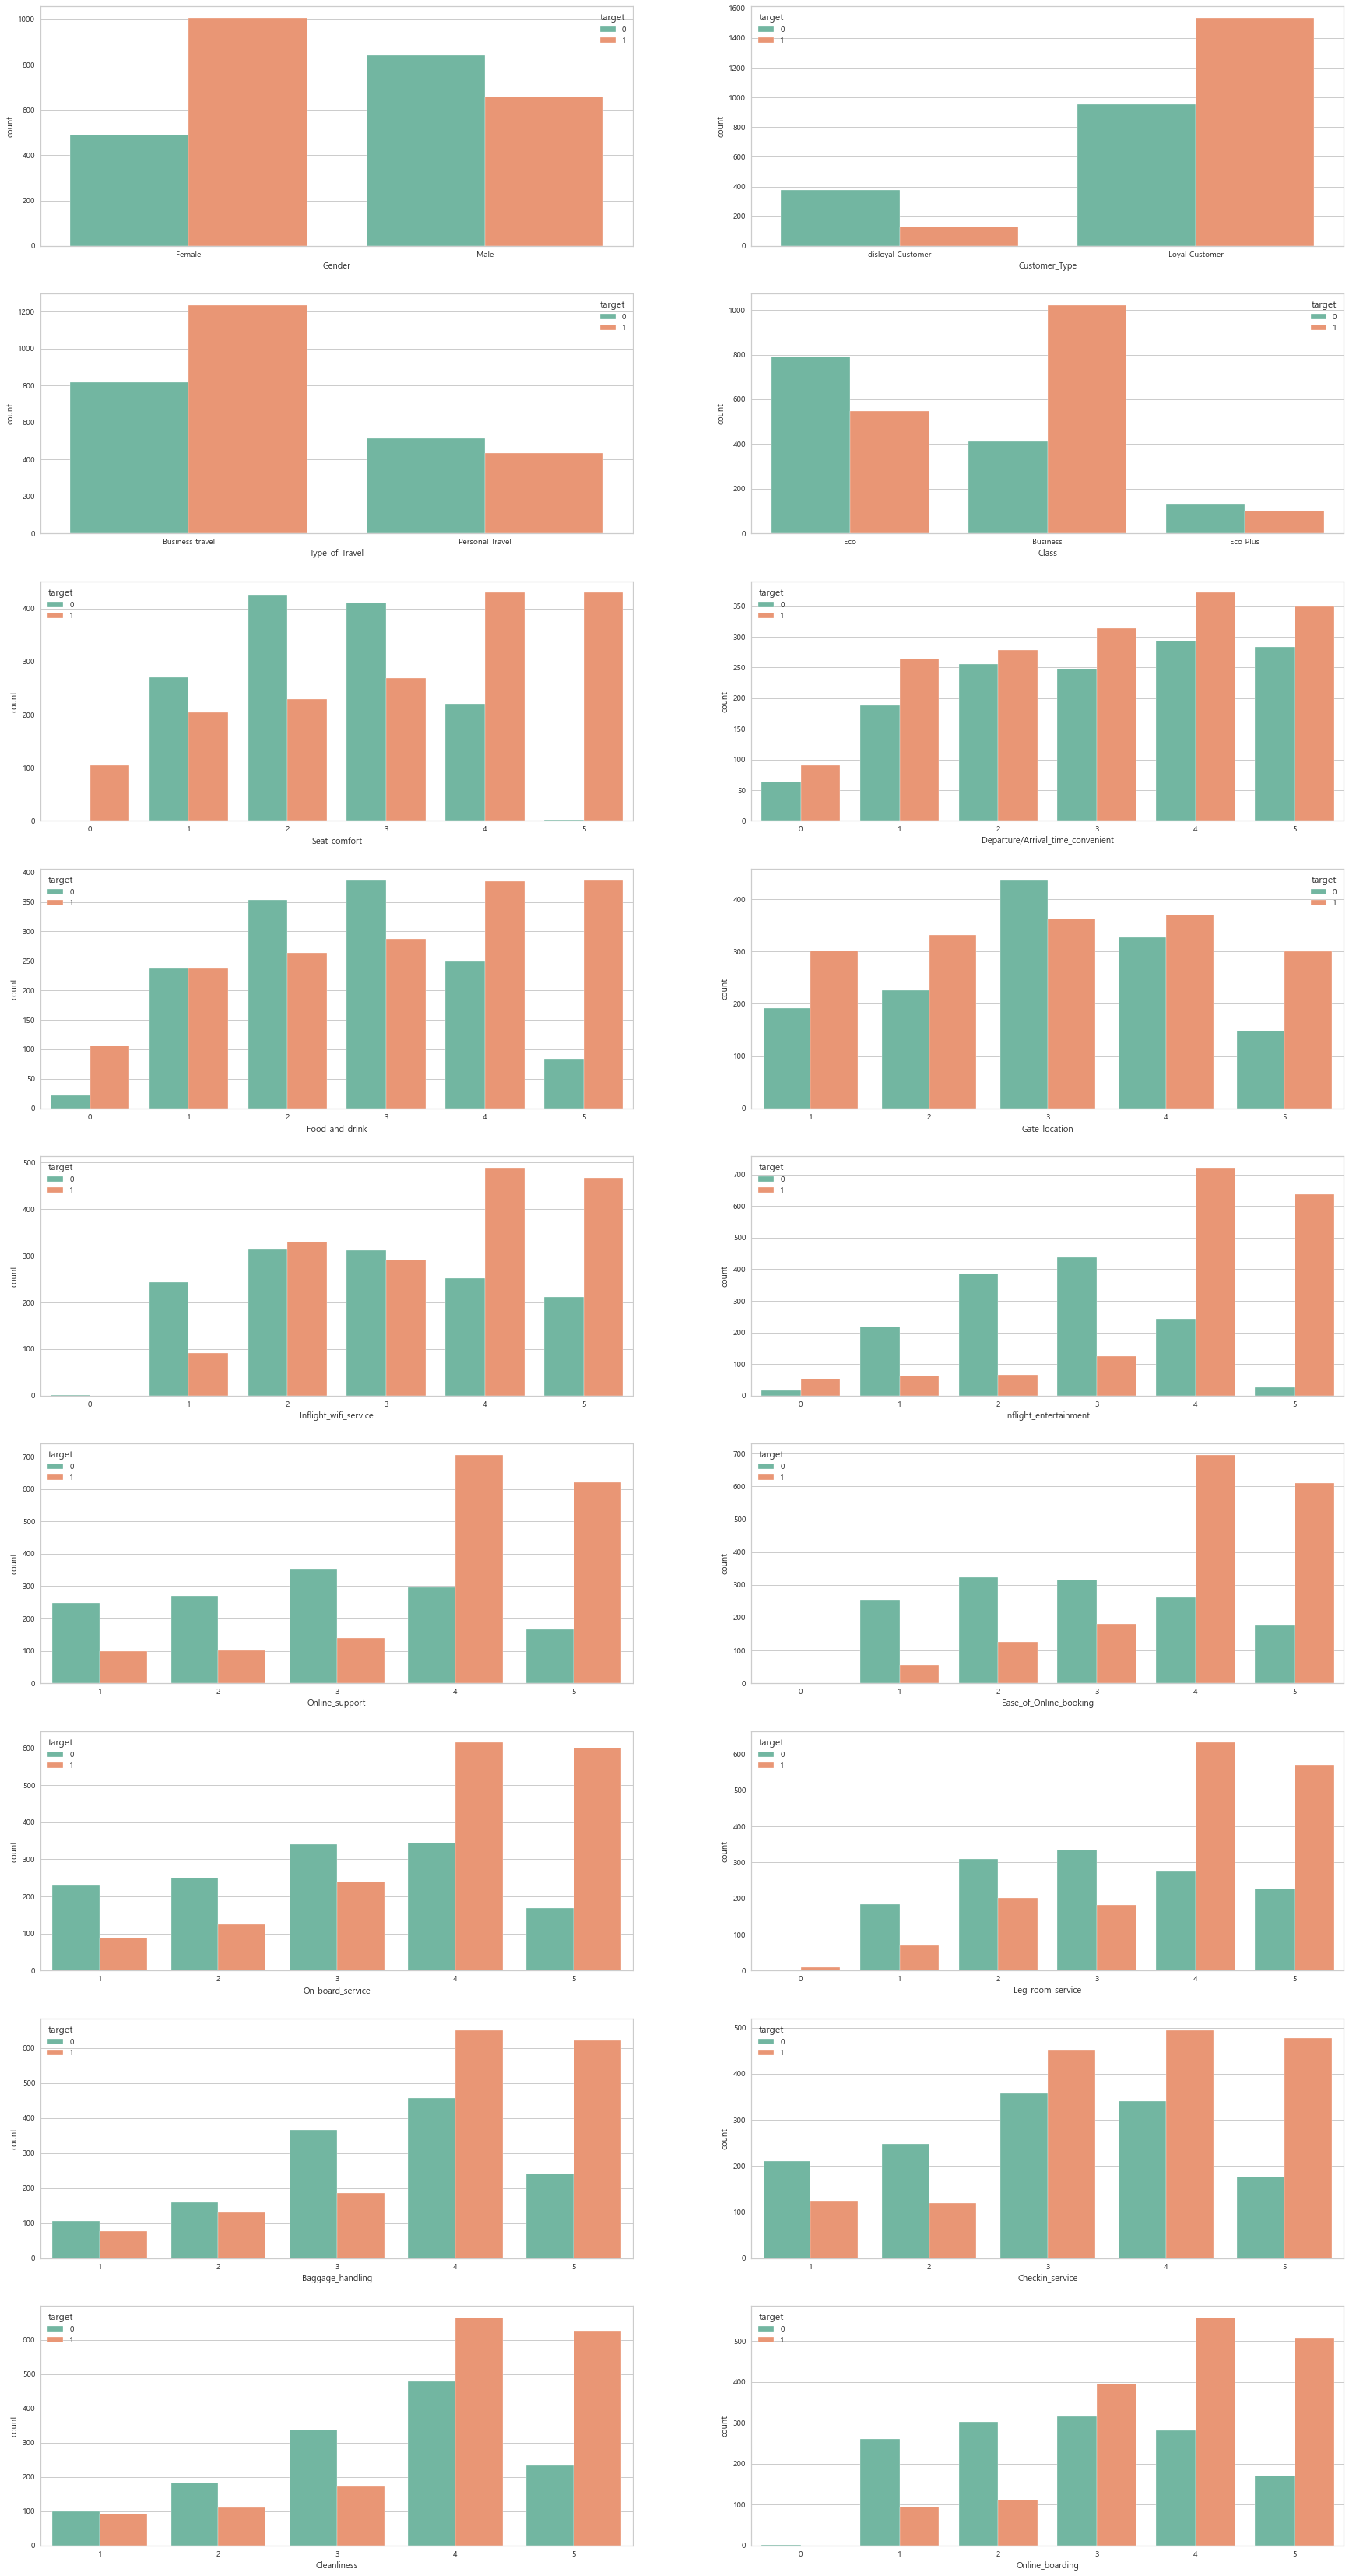

In [12]:
fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(30, 60))
for i, col_name in enumerate(cat_features):
    sns.countplot(x=col_name, hue='target', data=train, ax=ax[i//2][i%2], palette='Set2')
plt.show()

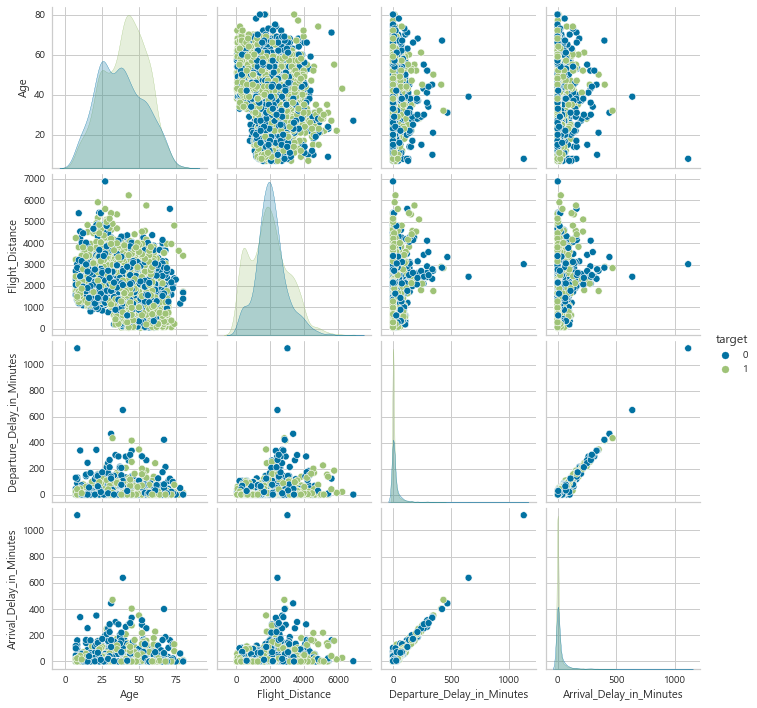

In [82]:
sns.pairplot(train[num_features+['target']], hue='target')

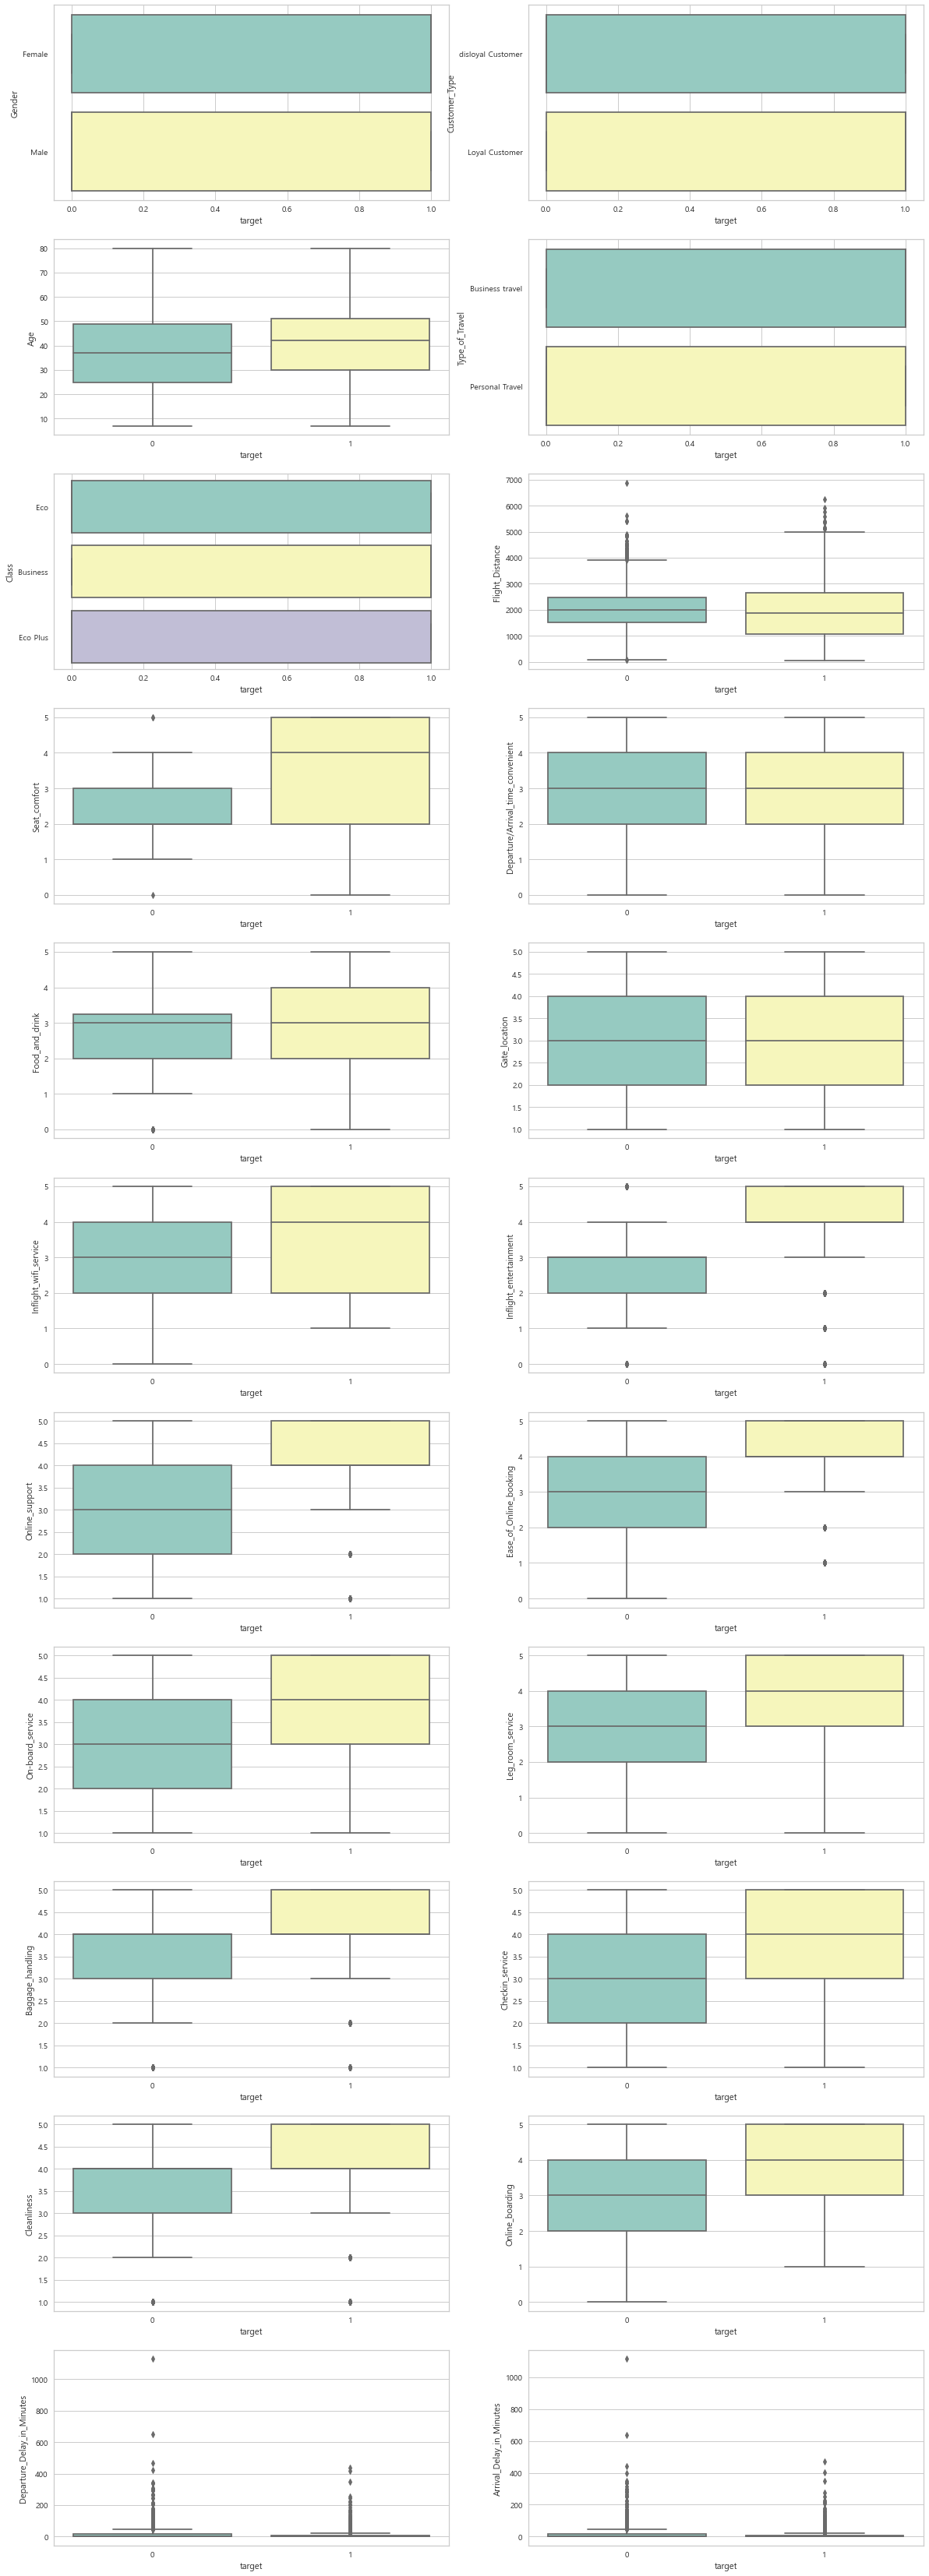

In [89]:
fig, ax = plt.subplots(nrows=11, ncols=2, figsize=(20,60))
for i, col in enumerate(train.columns[:-1]):
    sns.boxplot(data=train, x='target', y=col, palette='Set3', ax=ax[i//2][i%2], dodge=False)
plt.show()

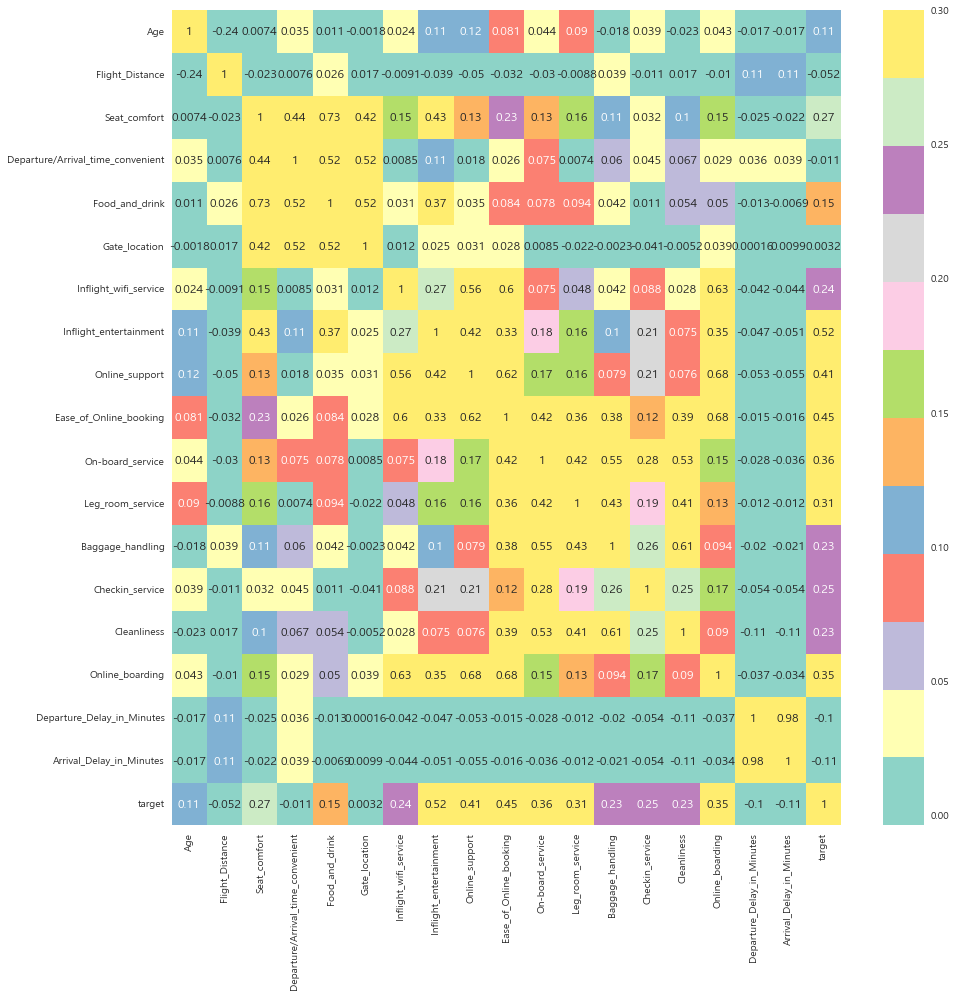

In [92]:
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(train.corr(), cmap='Set3', annot=True, vmin=-0.0040, vmax=0.3)

In [14]:
train.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Seat_comfort', 'Departure/Arrival_time_convenient',
       'Food_and_drink', 'Gate_location', 'Inflight_wifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Online_booking',
       'On-board_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes', 'target'],
      dtype='object')

상관관계가 서로 0.6이상인 feature 중 target과 상관관계가 더 낮은 feature 제거

In [49]:
train.drop(columns=['Departure_Delay_in_Minutes','Inflight_wifi_service','Online_boarding',
                                     'Baggage_handling','Food_and_drink'], inplace=True)

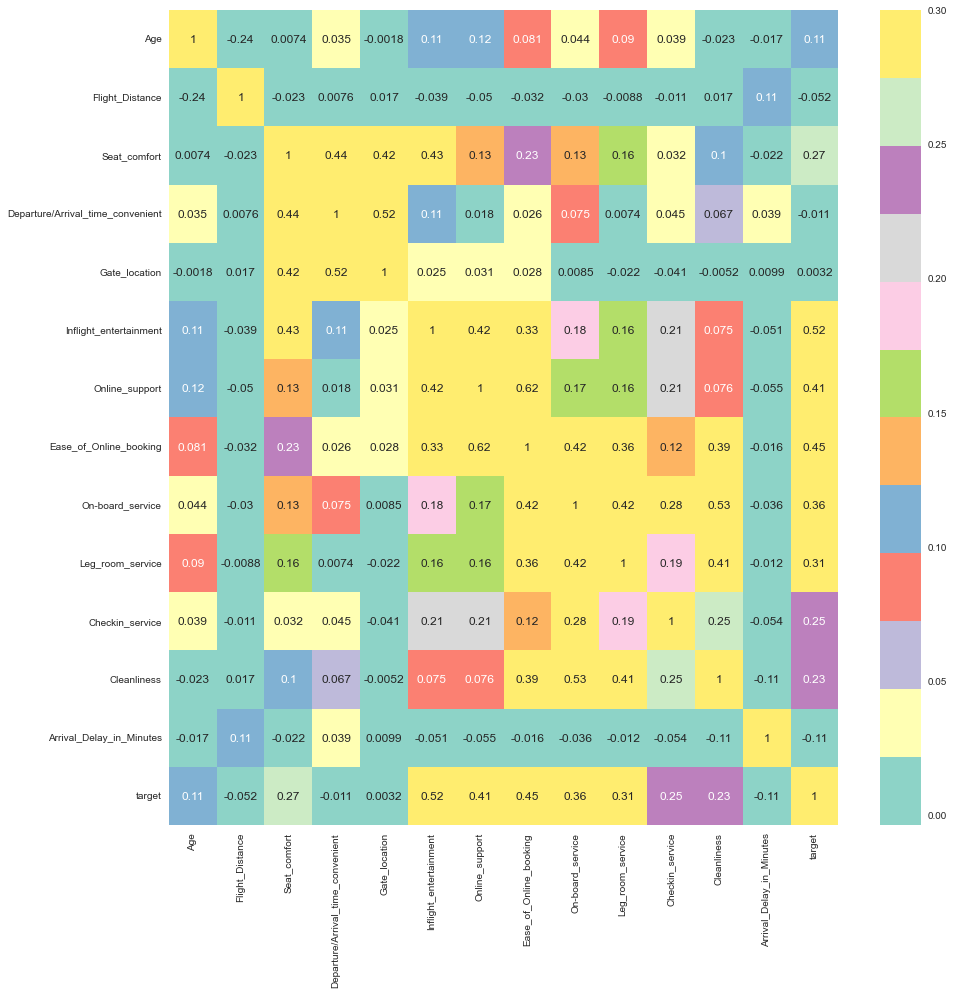

In [10]:
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(train.corr(), cmap='Set3', annot=True, vmin=-0.0040, vmax=0.3)

In [21]:
len(train.columns)

18

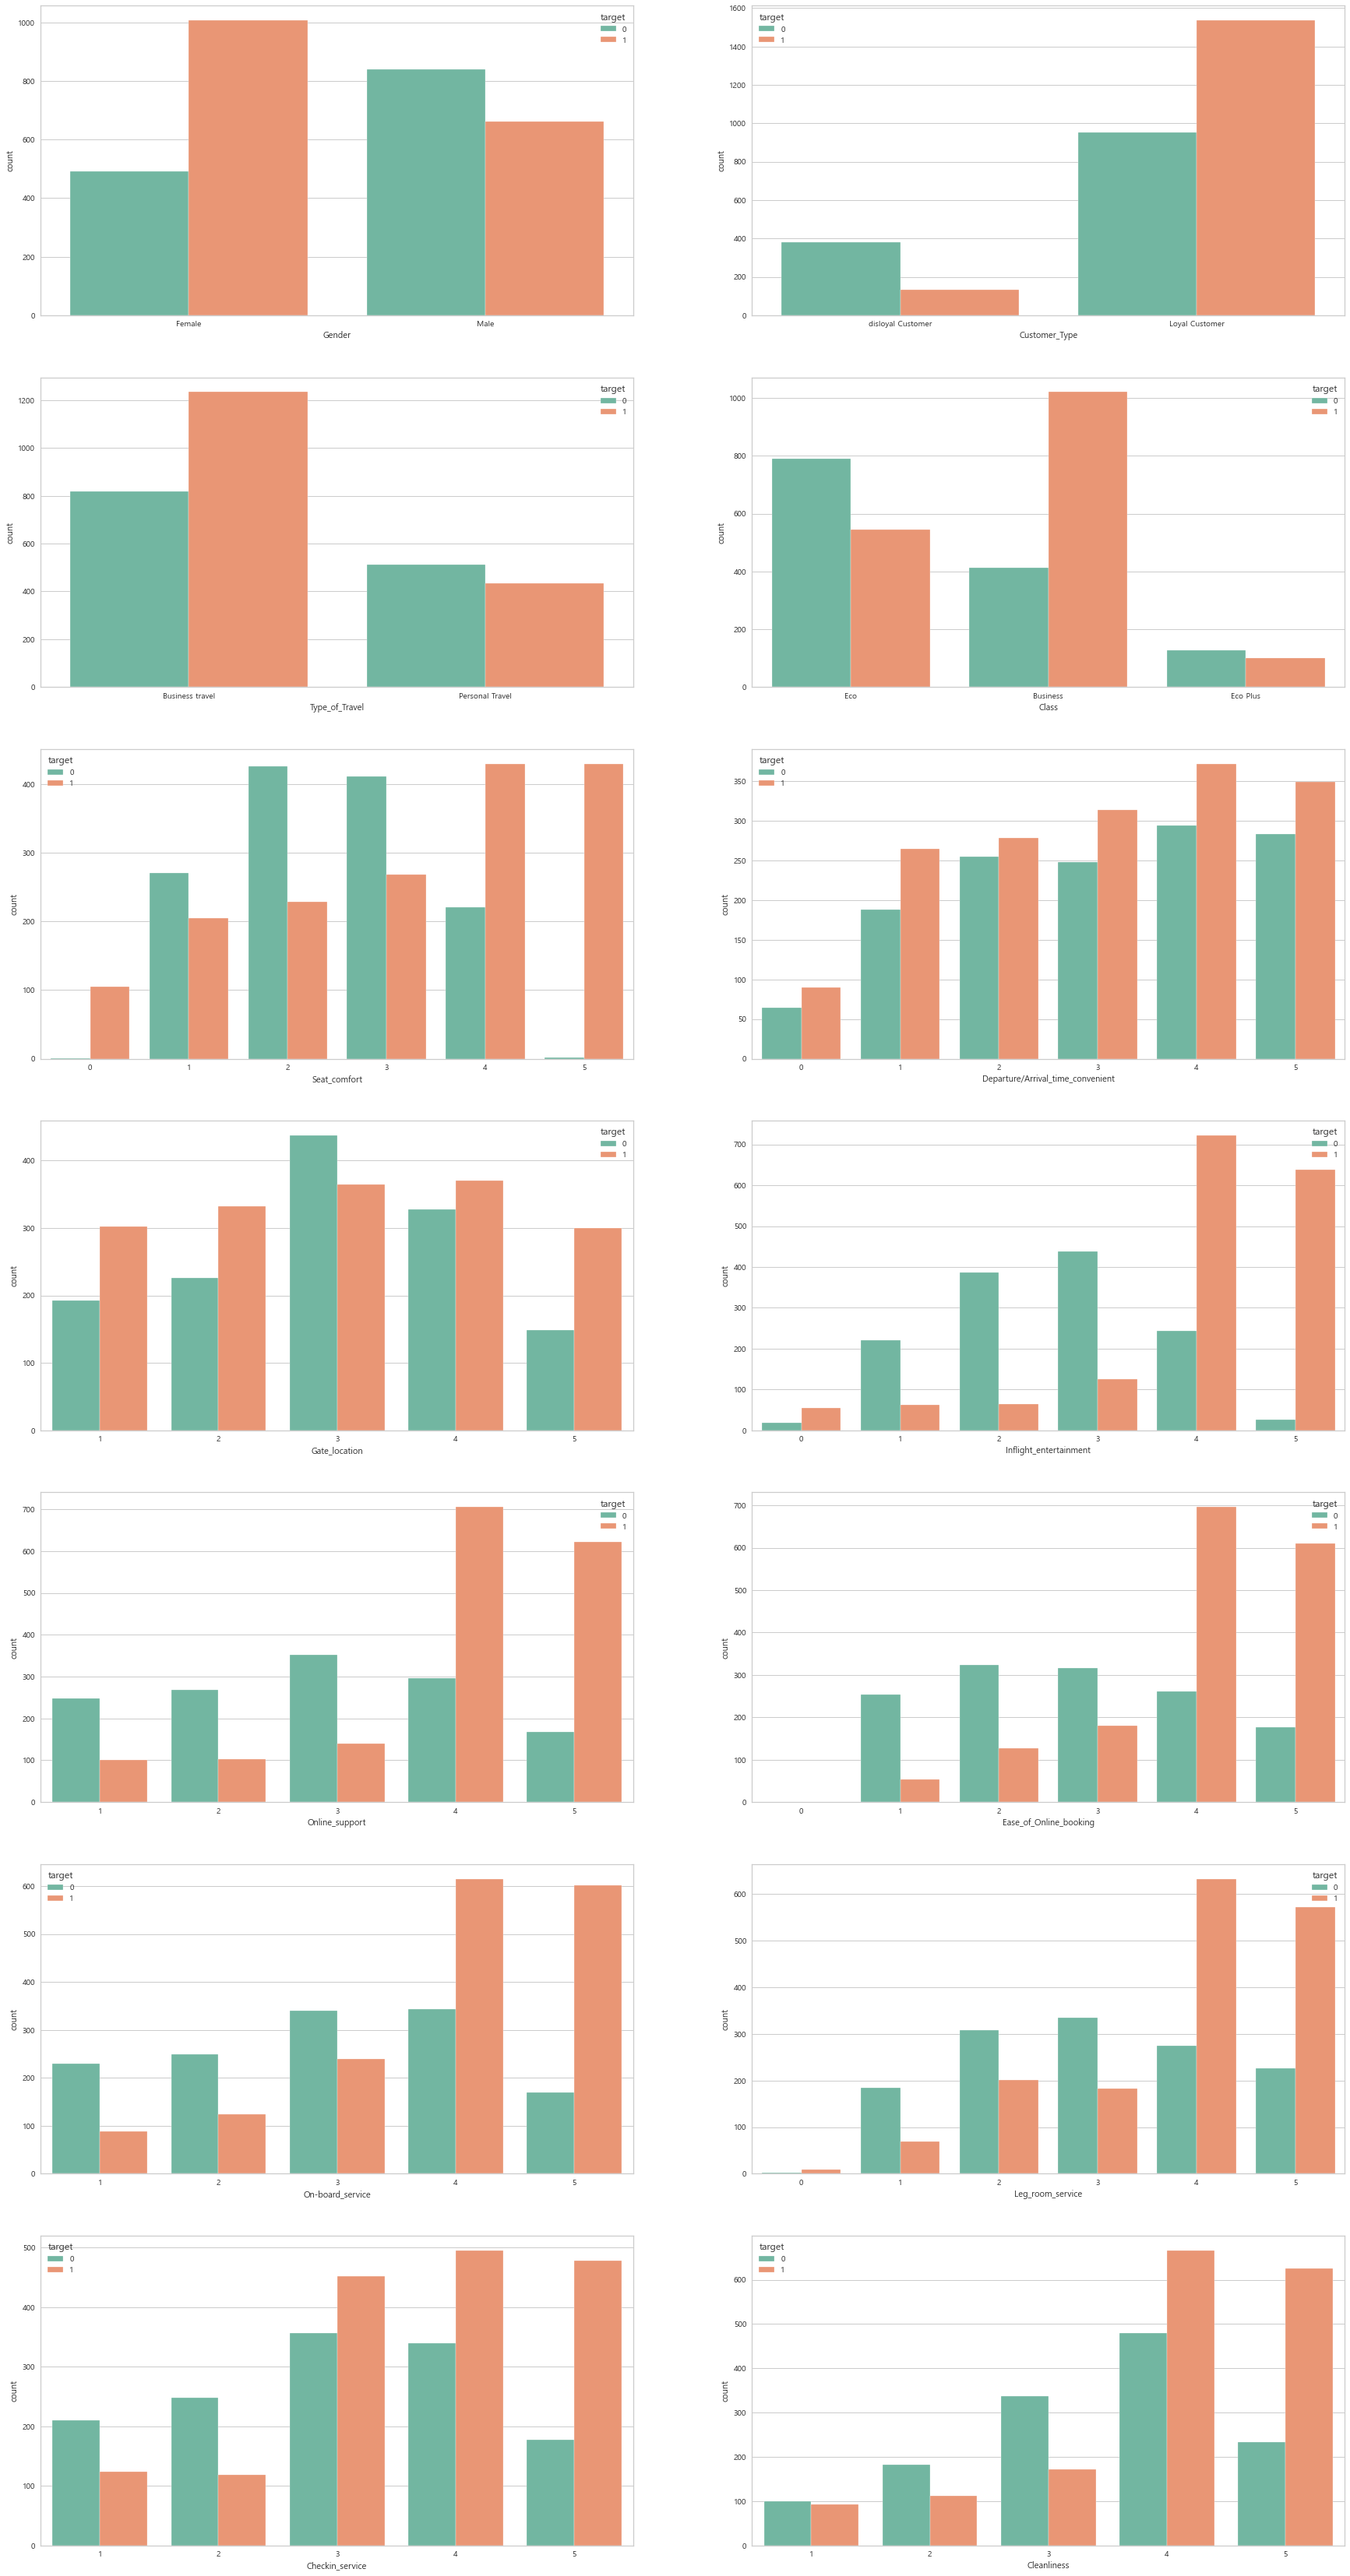

In [24]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(30, 60))
for i, col_name in enumerate(cat_features):
    sns.countplot(x=col_name, hue='target', data=train, ax=ax[i//2][i%2], palette='Set2')
plt.show()

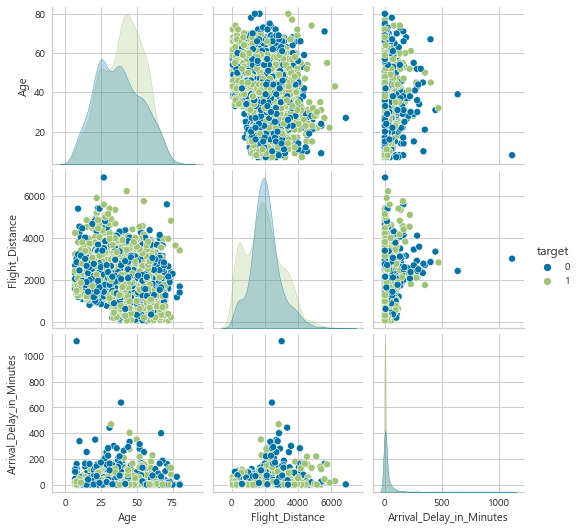

In [43]:
sns.pairplot(train[num_features+['target']], hue='target')

In [11]:
ignore_features =[]
cat_features = ['Gender', 'Customer_Type', 'Type_of_Travel', 'Class', 'Seat_comfort', 
                'Departure/Arrival_time_convenient', 'Gate_location', 'Inflight_entertainment', 
                'Online_support','Ease_of_Online_booking', 'On-board_service', 
                'Leg_room_service','Checkin_service', 'Cleanliness']
num_features = ['Age', 'Flight_Distance', 'Arrival_Delay_in_Minutes']

In [12]:
clf = setup(data=train, 
            target='target', 
            ignore_features=ignore_features,           
            categorical_features=cat_features, 
            numeric_features=num_features,
            remove_outliers=True,
            outliers_threshold=0.1,
            normalize=True,                            
#             handle_unknown_categorical=True,
#             imputation_type='iterative',              
#             iterative_imputation_iters=10,            
#             categorical_iterative_imputer='lightgbm',
#             polynomial_features=True,
            session_id=42, 
            silent=True,
            feature_selection=True,
            fix_imbalance=True,
            remove_multicollinearity=True,
#             ignore_low_variance=True,
#             profile=True
            ) 

create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Gender',
                                                            'Customer_Type',
                                                            'Type_of_Travel',
                                                            'Class',
                                                            'Seat_comfort',
                                                            'Departure/Arrival_time_convenient',
                                                            'Gate_location',
                                                            'Inflight_entertainment',
                                                            'Online_support',
                                                            'Ease_of_Online_booking',
                                                            'On-board_service',
    

In [14]:
best_models = compare_models(sort='Accuracy', n_select=3, fold=5, verbose=True)

create_model_container: 16
master_model_container: 16
display_container: 2
[<catboost.core.CatBoostClassifier object at 0x000001808E83D9C8>, LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_esti

In [15]:
tuned_top3 = [tune_model(model, fold=5, optimize='Accuracy',choose_better=True) for model in best_models]#, choose_better=True

create_model_container: 22
master_model_container: 22
display_container: 5
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)
tune_model() succesfully completed......................................


In [16]:
boost_cat10 = ensemble_model(tuned_top3[0], method="Boosting", fold=10, optimize='Accuracy')

create_model_container: 23
master_model_container: 23
display_container: 6
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=<catboost.core.CatBoostClassifier object at 0x000001808EDD2B48>,
                   learning_rate=1.0, n_estimators=10, random_state=42)
ensemble_model() succesfully completed......................................


In [18]:
prediction = predict_model(data=test, estimator=boost_cat10)
prediction

Initializing predict_model()
predict_model(estimator=AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=<catboost.core.CatBoostClassifier object at 0x000001808EDD2B48>,
                   learning_rate=1.0, n_estimators=10, random_state=42), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None)
Checking exceptions
Preloading libraries
Preparing display monitor


Gender      Customer_Type  Age   Type_of_Travel     Class  \
id                                                                
1     Female     Loyal Customer   61  Personal Travel       Eco   
2     Female  disloyal Customer   27  Business travel  Business   
3     Female     Loyal Customer   52  Business travel  Business   
4       Male     Loyal Customer   54  Business travel  Business   
5     Female     Loyal Customer   41  Business travel       Eco   
...      ...                ...  ...              ...       ...   
1996  Female     Loyal Customer   62  Business travel  Eco Plus   
1997  Female     Loyal Customer   33  Business travel  Business   
1998    Male     Loyal Customer   29  Business travel       Eco   
1999  Female     Loyal Customer   51  Personal Travel  Business   
2000  Female     Loyal Customer   46  Personal Travel  Eco Plus   

      Flight_Distance  Seat_comfort  Departure/Arrival_time_convenient  \
id                                                                       
1                2037             1                                  1   
2                1846             1                                  1   
3                1622             4                                  4   
4                3534             4                                  4   
5                1471             4                                  3   
...               ...           ...                                ...   
1996               54             3                                  1   
1997             1937             4                                  4   
1998             2398             3                                  5   
1999              406             5                                  2   
2000              436             5                                  5   

      Food_and_drink  Gate_location  ...  On-board_service  Leg_room_service  \
id                                   ...                                       
1                  1              1  ...                 5                 5   
2                  1              4  ...                 3                 4   
3                  4              4  ...                 5                 5   
4                  4              4  ...                 2                 2   
5                  3              3  ...                 3                 1   
...              ...            ...  ...               ...               ...   
1996               1              1  ...                 3                 3   
1997               4              4  ...                 5                 5   
1998               4              4  ...                 1                 2   
1999               5              4  ...                 2                 5   
2000               5              5  ...                 4                 4   

      Baggage_handling  Checkin_service  Cleanliness  Online_boarding  \
id                                                                      
1                    5                3            5                3   
2                    5                4            4                1   
3                    5                4            5                3   
4                    2                5            2                1   
5                    2                5            4                4   
...                ...              ...          ...              ...   
1996                 3                3            3                1   
1997                 5                1            5                3   
1998                 3                4            2                3   
1999                 2                2            2                2   
2000                 4                5            4                3   

      Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  Label   Score  
id                                                                         
1                           

In [20]:
submission = pd.read_csv('./data/sample_submission.csv', index_col=0)

In [21]:
submission.target = prediction.Label
submission

target
id          
1          1
2          0
3          1
4          1
5          1
...      ...
1996       0
1997       1
1998       0
1999       1
2000       1

[2000 rows x 1 columns]

In [22]:
submission.to_csv('catboost_boost10.csv')

LB 0.92

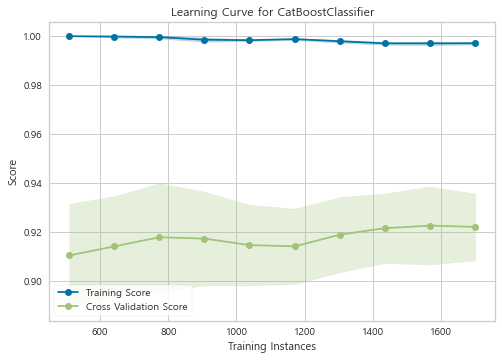

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [35]:
plot_model(tuned_top3[0], plot='learning')

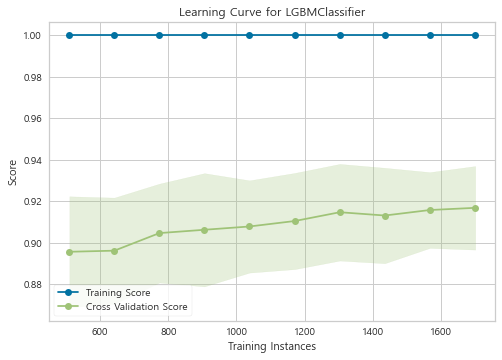

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [36]:
plot_model(tuned_top3[1], plot='learning')

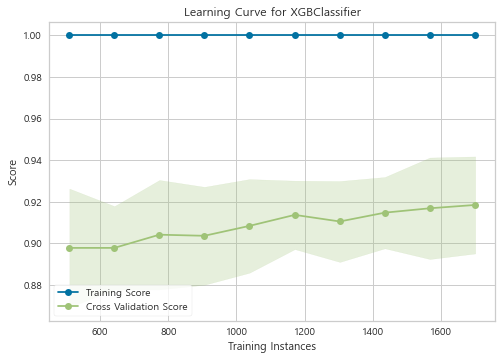

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [37]:
plot_model(tuned_top3[2], plot='learning')

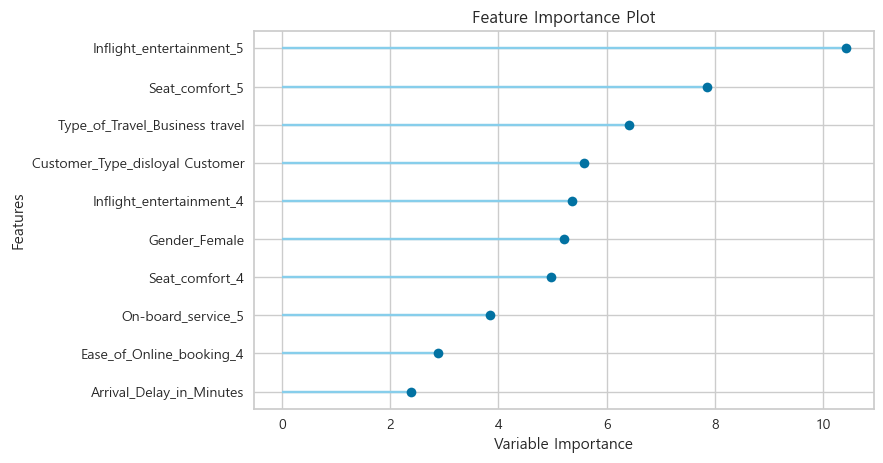

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [38]:
plot_model(tuned_top3[0], plot='feature')

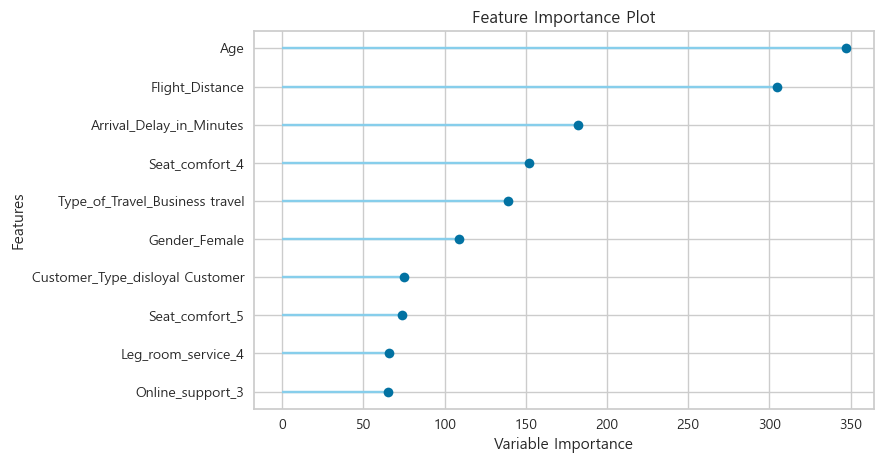

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [39]:
plot_model(tuned_top3[1], plot='feature')

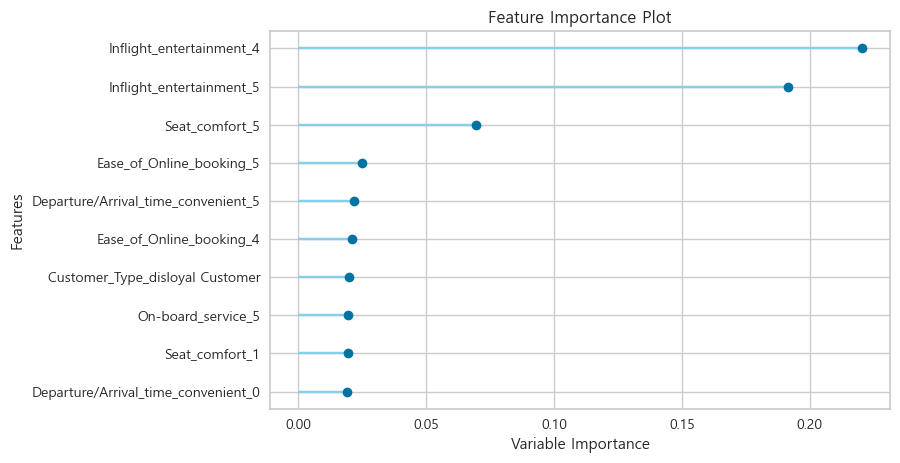

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [40]:
plot_model(tuned_top3[2], plot='feature')

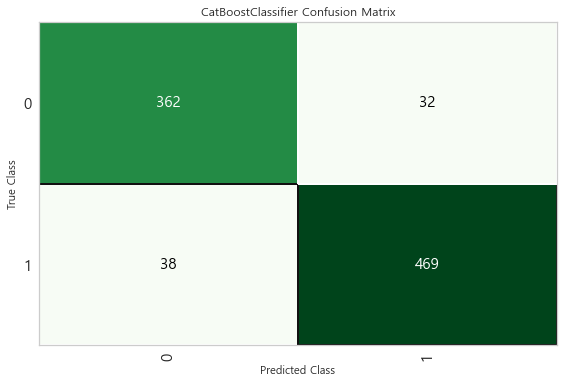

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [41]:
plot_model(tuned_top3[0], plot='confusion_matrix')

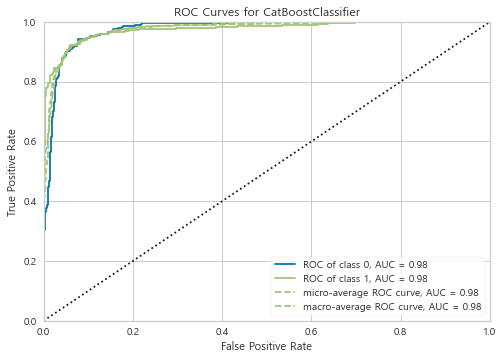

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [42]:
plot_model(tuned_top3[0], plot='auc')

overfitting으로 보여서 target과 상관관계가 적은 feature 제거


In [23]:
ignore_features =['Flight_Distance','Gate_location']
cat_features = ['Gender', 'Customer_Type', 'Type_of_Travel', 'Class', 'Seat_comfort', 
                'Departure/Arrival_time_convenient', 'Inflight_entertainment', 
                'Online_support','Ease_of_Online_booking', 'On-board_service', 
                'Leg_room_service','Checkin_service', 'Cleanliness']
num_features = ['Age', 'Arrival_Delay_in_Minutes']

In [24]:
clf = setup(data=train, 
            target='target', 
            ignore_features=ignore_features,           
            categorical_features=cat_features, 
            numeric_features=num_features,
            remove_outliers=True,
            outliers_threshold=0.1,
            normalize=True,                            
#             handle_unknown_categorical=True,
#             imputation_type='iterative',              
#             iterative_imputation_iters=10,            
#             categorical_iterative_imputer='lightgbm',
#             polynomial_features=True,
            session_id=42, 
            silent=True,
            feature_selection=True,
            fix_imbalance=True,
            remove_multicollinearity=True,
#             ignore_low_variance=True,
#             profile=True
            ) 

create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Gender',
                                                            'Customer_Type',
                                                            'Type_of_Travel',
                                                            'Class',
                                                            'Seat_comfort',
                                                            'Departure/Arrival_time_convenient',
                                                            'Inflight_entertainment',
                                                            'Online_support',
                                                            'Ease_of_Online_booking',
                                                            'On-board_service',
                                                            'Leg_room_service',
 

In [25]:
best_models = compare_models(sort='Accuracy', n_select=3, fold=5, verbose=True)

create_model_container: 16
master_model_container: 16
display_container: 2
[<catboost.core.CatBoostClassifier object at 0x000001808E839D08>, XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
    

In [26]:
tuned_top3 = [tune_model(model, fold=5, optimize='Accuracy',choose_better=True) for model in best_models]#, choose_better=True

create_model_container: 22
master_model_container: 22
display_container: 5
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
tune_model() succesfully completed......................................


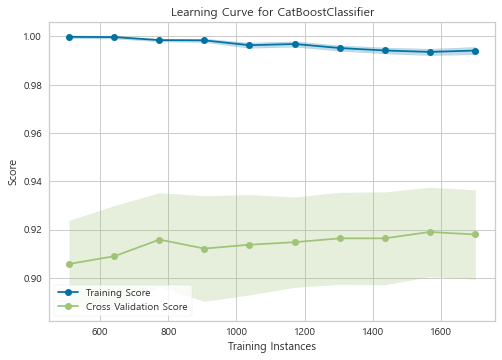

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [49]:
plot_model(tuned_top3[0], plot='learning')

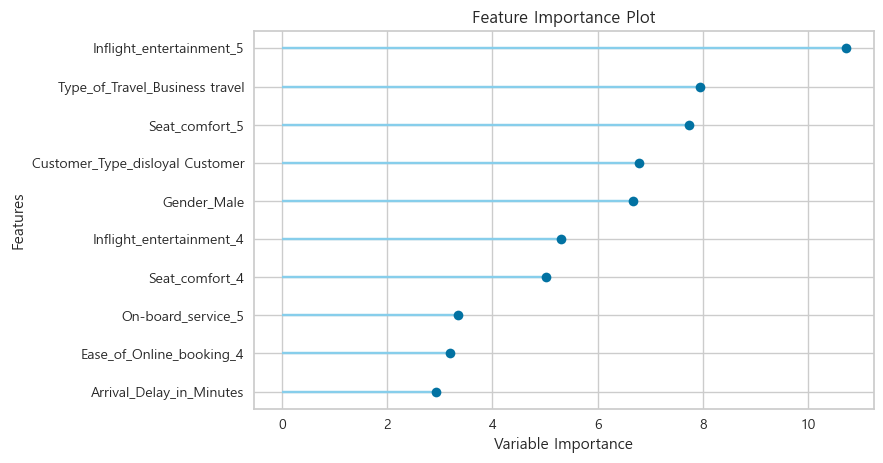

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [50]:
plot_model(tuned_top3[0], plot='feature')

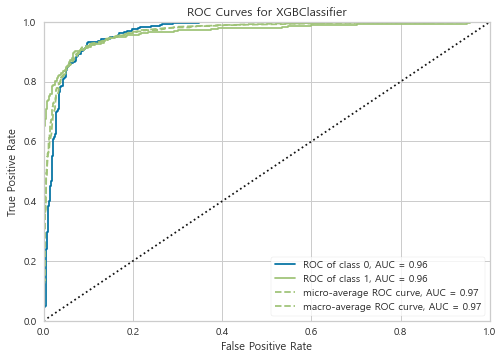

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [51]:
plot_model(tuned_top3[1], plot='auc')

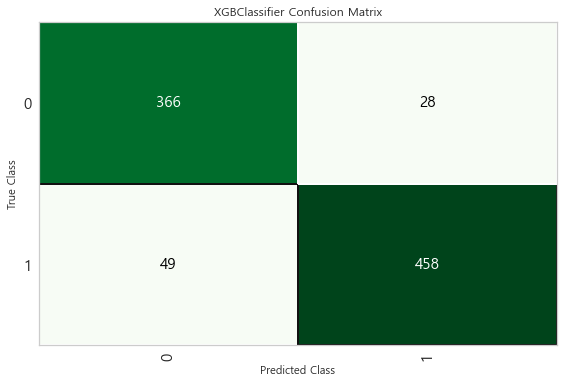

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [52]:
plot_model(tuned_top3[1], plot='confusion_matrix')

In [53]:
# boosting
boost_cat = ensemble_model(tuned_top3[0], method="Boosting", fold=5, optimize='Accuracy')


create_model_container: 23
master_model_container: 23
display_container: 6
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=<catboost.core.CatBoostClassifier object at 0x0000024650D450C8>,
                   learning_rate=1.0, n_estimators=10, random_state=42)
ensemble_model() succesfully completed......................................


In [54]:
bagging_cat = ensemble_model(tuned_top3[0], method='Bagging', n_estimators=10, choose_better=True,fold=5, optimize='Accuracy')


create_model_container: 25
master_model_container: 25
display_container: 7
ensemble_model() succesfully completed......................................


In [55]:
bagging_cat30 = ensemble_model(tuned_top3[0], method='Bagging', n_estimators=30, choose_better=True,fold=5, optimize='Accuracy')


create_model_container: 27
master_model_container: 27
display_container: 8
ensemble_model() succesfully completed......................................


In [27]:
boost_cat10 = ensemble_model(tuned_top3[0], method="Boosting", fold=10, optimize='Accuracy')

create_model_container: 23
master_model_container: 23
display_container: 6
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=<catboost.core.CatBoostClassifier object at 0x000001808E83DE08>,
                   learning_rate=1.0, n_estimators=10, random_state=42)
ensemble_model() succesfully completed......................................


In [28]:
boost_cat15 = ensemble_model(tuned_top3[0], method="Boosting", fold=15, optimize='Accuracy')

create_model_container: 24
master_model_container: 24
display_container: 7
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=<catboost.core.CatBoostClassifier object at 0x000001808EAAE2C8>,
                   learning_rate=1.0, n_estimators=10, random_state=42)
ensemble_model() succesfully completed......................................


In [29]:
prediction = predict_model(data=test, estimator=boost_cat15)
prediction

Initializing predict_model()
predict_model(estimator=AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=<catboost.core.CatBoostClassifier object at 0x000001808EAAE2C8>,
                   learning_rate=1.0, n_estimators=10, random_state=42), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None)
Checking exceptions
Preloading libraries
Preparing display monitor


Gender      Customer_Type  Age   Type_of_Travel     Class  \
id                                                                
1     Female     Loyal Customer   61  Personal Travel       Eco   
2     Female  disloyal Customer   27  Business travel  Business   
3     Female     Loyal Customer   52  Business travel  Business   
4       Male     Loyal Customer   54  Business travel  Business   
5     Female     Loyal Customer   41  Business travel       Eco   
...      ...                ...  ...              ...       ...   
1996  Female     Loyal Customer   62  Business travel  Eco Plus   
1997  Female     Loyal Customer   33  Business travel  Business   
1998    Male     Loyal Customer   29  Business travel       Eco   
1999  Female     Loyal Customer   51  Personal Travel  Business   
2000  Female     Loyal Customer   46  Personal Travel  Eco Plus   

      Flight_Distance  Seat_comfort  Departure/Arrival_time_convenient  \
id                                                                       
1                2037             1                                  1   
2                1846             1                                  1   
3                1622             4                                  4   
4                3534             4                                  4   
5                1471             4                                  3   
...               ...           ...                                ...   
1996               54             3                                  1   
1997             1937             4                                  4   
1998             2398             3                                  5   
1999              406             5                                  2   
2000              436             5                                  5   

      Food_and_drink  Gate_location  ...  On-board_service  Leg_room_service  \
id                                   ...                                       
1                  1              1  ...                 5                 5   
2                  1              4  ...                 3                 4   
3                  4              4  ...                 5                 5   
4                  4              4  ...                 2                 2   
5                  3              3  ...                 3                 1   
...              ...            ...  ...               ...               ...   
1996               1              1  ...                 3                 3   
1997               4              4  ...                 5                 5   
1998               4              4  ...                 1                 2   
1999               5              4  ...                 2                 5   
2000               5              5  ...                 4                 4   

      Baggage_handling  Checkin_service  Cleanliness  Online_boarding  \
id                                                                      
1                    5                3            5                3   
2                    5                4            4                1   
3                    5                4            5                3   
4                    2                5            2                1   
5                    2                5            4                4   
...                ...              ...          ...              ...   
1996                 3                3            3                1   
1997                 5                1            5                3   
1998                 3                4            2                3   
1999                 2                2            2                2   
2000                 4                5            4                3   

      Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  Label   Score  
id                                                                         
1                           

In [30]:
submission.target = prediction.Label
submission

target
id          
1          1
2          0
3          1
4          1
5          1
...      ...
1996       0
1997       1
1998       0
1999       1
2000       1

[2000 rows x 1 columns]

In [31]:
submission.to_csv('catboost_boost15.csv')

LB 0.92

다른 항목들은 1에서 5의 항목까지 있는 반면 0에서 5까지의 범위가 있는 항목들이 종종 있음--> 0을 결측치로 추정 

In [50]:
train.loc[train['Seat_comfort']==0, 'Seat_comfort'] = np.nan
train.loc[train['Departure/Arrival_time_convenient']==0, 'Departure/Arrival_time_convenient'] = np.nan
train.loc[train['Inflight_entertainment']==0, 'Inflight_entertainment'] = np.nan
train.loc[train['Ease_of_Online_booking']==0, 'Ease_of_Online_booking'] = np.nan
train.loc[train['Leg_room_service']==0, 'Leg_room_service'] = np.nan

In [51]:
train.isna().sum()

Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Seat_comfort                         106
Departure/Arrival_time_convenient    154
Gate_location                          0
Inflight_entertainment                73
Online_support                         0
Ease_of_Online_booking                 1
On-board_service                       0
Leg_room_service                      11
Checkin_service                        0
Cleanliness                            0
Arrival_Delay_in_Minutes               0
target                                 0
dtype: int64

lightgbm으로 imputation

In [76]:
ignore_features =[]
cat_features = ['Gender', 'Customer_Type', 'Type_of_Travel', 'Class', 'Seat_comfort', 
                'Departure/Arrival_time_convenient', 'Gate_location', 'Inflight_entertainment', 
                'Online_support','Ease_of_Online_booking', 'On-board_service', 
                'Leg_room_service','Checkin_service', 'Cleanliness']
num_features = ['Age', 'Flight_Distance', 'Arrival_Delay_in_Minutes']
#0.9089

In [77]:
clf = setup(data=train, 
            target='target', 
            ignore_features=ignore_features,           
            categorical_features=cat_features, 
            numeric_features=num_features,
            remove_outliers=True,
            outliers_threshold=0.1,
            normalize=True,                            
#             handle_unknown_categorical=True,
            imputation_type='iterative',              
            iterative_imputation_iters=10,            
            categorical_iterative_imputer='lightgbm',
#             polynomial_features=True,
            session_id=42, 
            silent=True,
#             feature_selection=True,
#             fix_imbalance=True,
            remove_multicollinearity=True,
#             ignore_low_variance=True,
#             profile=True
            ) 

create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Gender',
                                                            'Customer_Type',
                                                            'Type_of_Travel',
                                                            'Class',
                                                            'Seat_comfort',
                                                            'Departure/Arrival_time_convenient',
                                                            'Gate_location',
                                                            'Inflight_entertainment',
                                                            'Online_support',
                                                            'Ease_of_Online_booking',
                                                            'On-board_service',
    

In [78]:
best_models = compare_models(sort='Accuracy', n_select=3, fold=5, verbose=True)

create_model_container: 16
master_model_container: 16
display_container: 2
[<catboost.core.CatBoostClassifier object at 0x00000180950E4148>, XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,


In [79]:
tuned_top3 = [tune_model(model, fold=5, optimize='Accuracy',choose_better=True) for model in best_models]#, choose_better=True

create_model_container: 22
master_model_container: 22
display_container: 5
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
tune_model() succesfully completed......................................


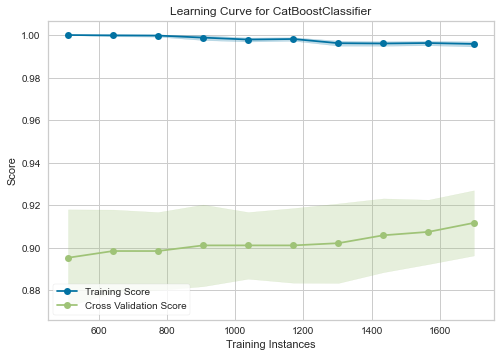

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [80]:
plot_model(tuned_top3[0], plot='learning')

In [81]:
boost_cat15 = ensemble_model(tuned_top3[0], method="Boosting", fold=15, optimize='Accuracy')

create_model_container: 23
master_model_container: 23
display_container: 6
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=<catboost.core.CatBoostClassifier object at 0x0000018094F3B908>,
                   learning_rate=1.0, n_estimators=10, random_state=42)
ensemble_model() succesfully completed......................................


In [82]:
boost_cat10 = ensemble_model(tuned_top3[0], method="Boosting", fold=15, optimize='Accuracy')

create_model_container: 24
master_model_container: 24
display_container: 7
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=<catboost.core.CatBoostClassifier object at 0x0000018098D0B4C8>,
                   learning_rate=1.0, n_estimators=10, random_state=42)
ensemble_model() succesfully completed......................................


In [83]:
prediction = predict_model(data=test, estimator=boost_cat10)
prediction

Initializing predict_model()
predict_model(estimator=AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=<catboost.core.CatBoostClassifier object at 0x0000018098D0B4C8>,
                   learning_rate=1.0, n_estimators=10, random_state=42), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None)
Checking exceptions
Preloading libraries
Preparing display monitor


Gender      Customer_Type  Age   Type_of_Travel     Class  \
id                                                                
1     Female     Loyal Customer   61  Personal Travel       Eco   
2     Female  disloyal Customer   27  Business travel  Business   
3     Female     Loyal Customer   52  Business travel  Business   
4       Male     Loyal Customer   54  Business travel  Business   
5     Female     Loyal Customer   41  Business travel       Eco   
...      ...                ...  ...              ...       ...   
1996  Female     Loyal Customer   62  Business travel  Eco Plus   
1997  Female     Loyal Customer   33  Business travel  Business   
1998    Male     Loyal Customer   29  Business travel       Eco   
1999  Female     Loyal Customer   51  Personal Travel  Business   
2000  Female     Loyal Customer   46  Personal Travel  Eco Plus   

      Flight_Distance  Seat_comfort  Departure/Arrival_time_convenient  \
id                                                                       
1                2037             1                                  1   
2                1846             1                                  1   
3                1622             4                                  4   
4                3534             4                                  4   
5                1471             4                                  3   
...               ...           ...                                ...   
1996               54             3                                  1   
1997             1937             4                                  4   
1998             2398             3                                  5   
1999              406             5                                  2   
2000              436             5                                  5   

      Food_and_drink  Gate_location  ...  On-board_service  Leg_room_service  \
id                                   ...                                       
1                  1              1  ...                 5                 5   
2                  1              4  ...                 3                 4   
3                  4              4  ...                 5                 5   
4                  4              4  ...                 2                 2   
5                  3              3  ...                 3                 1   
...              ...            ...  ...               ...               ...   
1996               1              1  ...                 3                 3   
1997               4              4  ...                 5                 5   
1998               4              4  ...                 1                 2   
1999               5              4  ...                 2                 5   
2000               5              5  ...                 4                 4   

      Baggage_handling  Checkin_service  Cleanliness  Online_boarding  \
id                                                                      
1                    5                3            5                3   
2                    5                4            4                1   
3                    5                4            5                3   
4                    2                5            2                1   
5                    2                5            4                4   
...                ...              ...          ...              ...   
1996                 3                3            3                1   
1997                 5                1            5                3   
1998                 3                4            2                3   
1999                 2                2            2                2   
2000                 4                5            4                3   

      Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  Label   Score  
id                                                                         
1                           

In [85]:
submission.to_csv('catboost_boost10_imputation.csv')

LB 0.92 ...;;